In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.naive_bayes import MultinomialNB
import re
import tkinter as tk
from tkinter import messagebox
import time


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Compulap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Compulap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [182]:
df =  pd.read_csv(r"E:\spam.csv", encoding='ISO-8859-1')
print(df.shape)
df.head()

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [183]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

Change the v1 & v2 columns as class and Message

In [184]:
df.rename(columns={"v1": "class", "v2": "Message"}, inplace=True)

In [185]:
df.isnull().sum()

class      0
Message    0
dtype: int64

In [186]:
df.duplicated().sum()

403

In [187]:
data = df.drop_duplicates(keep='first')

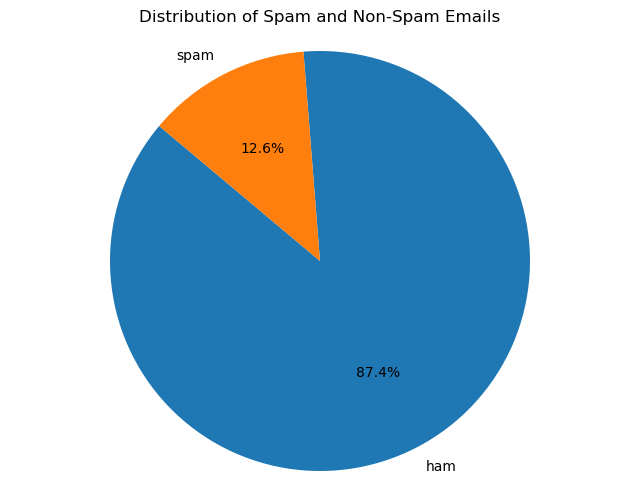

In [188]:
data['class'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(data['class'].value_counts(), labels=data['class'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.axis('equal')
plt.show()

Ham=1
spam=0

In [189]:
df.loc[df["class"]=='ham',"class",]=1
df.loc[df["class"]=='spam',"class",]=0
df.head()

,class,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [190]:
df_x=df["Message"]
df_y=df["class"]

In [191]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

calculate the number of ham and spam emails 

In [192]:
ham_count = sum(y_test == 1)
spam_count = sum(y_test == 0)
(ham_count,spam_count)

(941, 174)

In [193]:
def clean_text(text):
    text = str(text)
    text = text.lower()
    matches = re.findall(r'[a-z\s]+', text)
    cleaned_text = ' '.join(matches)
    return cleaned_text
x_train_cleaned = [clean_text(email) for email in x_train]
x_test_cleaned = [clean_text(email) for email in x_test]
print(x_train_cleaned[0])
print(x_test_cleaned[0])

claire here am havin borin time   am now alone u wanna cum over  nite  chat now   hope   c u luv claire xx calls minmoremobsemspobox po wa
 ow u dey i paid  thousad i told  u would call   


word tokenization

In [194]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() # create an object of the WordNetLemmatizer
def preprocess_text(text):
    text = str(text).lower()  
    tokens = word_tokenize(text)  
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words] # remove punctuation and stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens] # lemmatize the words
    return tokens


filtered_X_train = [preprocess_text(email) for email in x_train_cleaned]
filtered_X_test = [preprocess_text(email) for email in x_test_cleaned]

print(filtered_X_train[0])
print(filtered_X_test[0])

['claire', 'havin', 'borin', 'time', 'alone', 'u', 'wan', 'na', 'cum', 'nite', 'chat', 'hope', 'c', 'u', 'luv', 'claire', 'xx', 'call', 'minmoremobsemspobox', 'po', 'wa']
['ow', 'u', 'dey', 'paid', 'thousad', 'told', 'u', 'would', 'call']


In [195]:
X_train= [' '.join(tokens) for tokens in filtered_X_train] # return x_train to text عشان يعرف يتعامل معاه لانه بيتعامل مع نصوص مش tokens
X_test= [' '.join(tokens) for tokens in filtered_X_test] # return x_train to text عشان يعرف يتعامل معاه لانه بيتعامل مع نصوص مش tokens
print(X_train[0])
print(X_test[0])


claire havin borin time alone u wan na cum nite chat hope c u luv claire xx call minmoremobsemspobox po wa
ow u dey paid thousad told u would call


In [196]:
vectorizer = TfidfVectorizer(max_features=2000) 
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



In [197]:
a=X_train_tfidf.toarray()
b=X_test_tfidf.toarray()
a[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [198]:
y_train=y_train.astype('int')
y_train

1457    0
472     1
2481    1
243     1
1413    0
       ..
3671    1
709     0
2487    1
174     1
1146    1
Name: class, Length: 4457, dtype: int32

In [199]:
model = MultinomialNB()

In [200]:
model.fit(X_train_tfidf,y_train)

MultinomialNB()

In [201]:
predictions=model.predict(X_test_tfidf)
predictions = predictions.astype(int)
predictions

array([1, 1, 0, ..., 1, 0, 0])

In [202]:
a=np.array(y_test)
y_test = y_test.astype(int)
a

array([1, 1, 0, ..., 1, 0, 0], dtype=object)

In [203]:
count=0
for i in range (len(predictions)):
    if predictions[i]==a[i]:
        count=count+1
count

1085

In [204]:
len(predictions)

1115

هنا اتحسبت من غير fuctions جاهزة 

In [205]:
1085/1115

0.9730941704035875

confusion_matrix

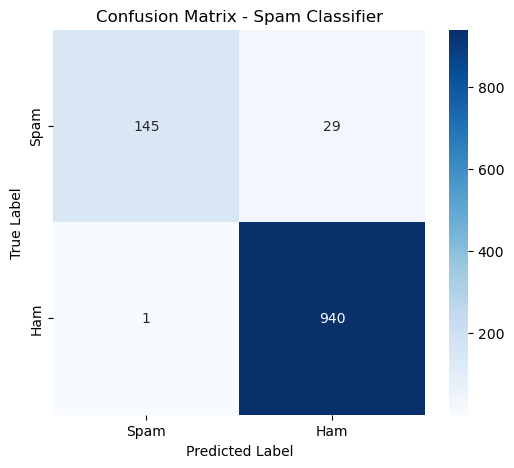

In [206]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Spam Classifier')
plt.show()

In [207]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


In [208]:
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 97.31%
Precision: 97.01%
Recall: 99.89%
F1 Score: 98.43%


learning curve

In [209]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train_tfidf,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)


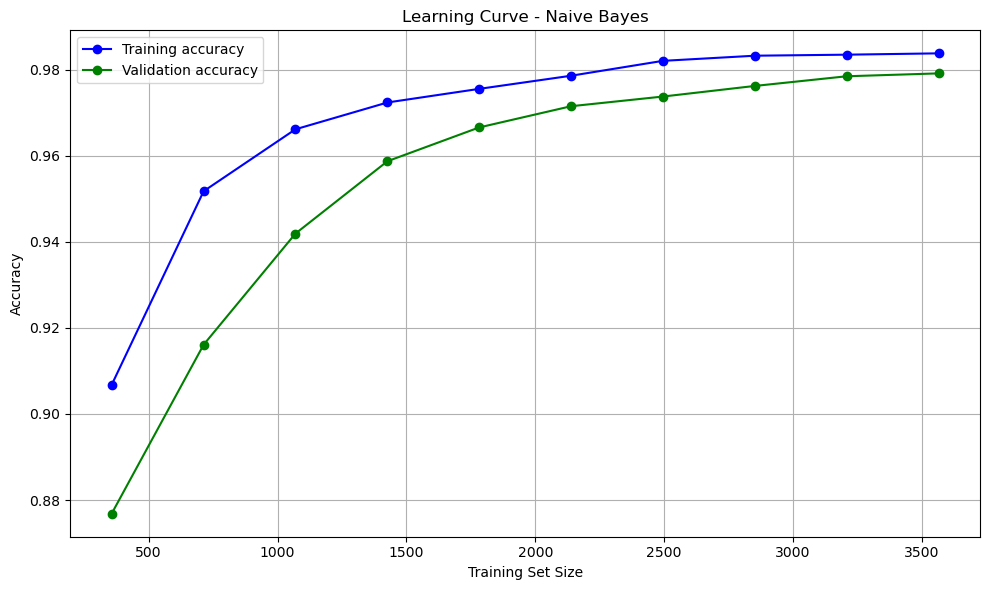

In [210]:
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation accuracy')
plt.title('Learning Curve - Naive Bayes')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

GUI

In [211]:
import tkinter as tk
from tkinter import messagebox
def predict_email(email_text, model, vectorizer):
    clean_input = preprocess_text(email_text)
    clean_input = ' '.join(clean_input)
    input_tfidf = vectorizer.transform([clean_input])
    prediction = model.predict(input_tfidf)[0]
    if prediction == 1:
        return "Ham"
    else:
        return "Spam"


Eamples of Emails as a input:
1-You've been selected for a special cash reward!
2-Act now to double your income! Limited spots available.
3-Don't forget about the team lunch tomorrow afternoon
3-URGENT: Your PayPal account has been locked. Verify now!

In [214]:
def animate_title():
    text = "Spam Email Detector"
    for i in range(len(text) + 1):
        title_label.config(text=text[:i])
        root.update()
        time.sleep(0.05)

def predict_button_clicked():
    email_text = text_input.get("1.0", tk.END).strip()
    if email_text == "":
        messagebox.showwarning("Warning", "Please enter an email text!")
    else:
        result = predict_email(email_text, model, vectorizer)  
        if result == "Ham":
            color = "#4CAF50"
        else:
            color = "#F44336"
        
        
        result_label.config(text="Analyzing...", fg="#888")
        root.update()
        time.sleep(0.8)
        
        result_label.config(text=f"Result: {result}", fg=color)


root = tk.Tk()
root.title("Spam Email Detector 🛡️")
root.geometry("700x600")
root.configure(bg="#ECECEC")


title_label = tk.Label(root, text="", font=("Helvetica", 28, "bold"), bg="#ECECEC", fg="#333")
title_label.pack(pady=20)
root.after(100, animate_title)


subtitle_label = tk.Label(root, text="Check if an email is Spam or not!", font=("Helvetica", 14), bg="#ECECEC", fg="#666")
subtitle_label.pack(pady=5)


label = tk.Label(root, text="Enter Email Text:", font=("Helvetica", 16), bg="#ECECEC", fg="#444")
label.pack(pady=10)

text_input = tk.Text(root, height=12, width=70, font=("Helvetica", 12))
text_input.pack(pady=10)

# Predict Button
predict_button = tk.Button(root, text="Predict", command=predict_button_clicked, font=("Helvetica", 16, "bold"),
                           bg="#2196F3", fg="white", padx=20, pady=10, relief="raised", bd=4)
predict_button.pack(pady=20)

# Result Label
result_label = tk.Label(root, text="", font=("Helvetica", 18, "bold"), bg="#ECECEC")
result_label.pack(pady=20)

root.mainloop()
